<center><h1>Mineria de Datos</header1></center>

Presentado por: Caiza Klar,
                Molina Joel,
                Vera Karla - Grupo #2 <br>
Lider: Caiza Klar  <br>
Fecha: 16/08/2022

# Importación de librerias necesarias

In [1]:
'''Leer y escribir archivps em diferentes formatos'''
import pandas as pd
'''Sirver para realizar cálculos numéricos y analizar los datos'''
import numpy as np
'''convertir la visualización en una parte central de la exploración y comprensión de los datos'''
import seaborn as sns
'''Sirve para realizar gráficas'''
import matplotlib.pyplot as plt
%matplotlib inline

## Cargar el Dataset

In [2]:
'''Definir el conjunto de datos (voice.csv) en una variable(url)'''
url='https://raw.githubusercontent.com/kscaiza2/Dataset/main/voice.csv'

In [3]:
'''Leer el conjunto de datos de la variable url'''
df_Datos= pd.read_csv(url)
'''Imprimir e conjunto de datos'''
df_Datos.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


## Descripción de la fuente del Dataset

El conjunto de datos Las siguientes propiedades acústicas de cada voz se miden e incluyen dentro del dataset:

meanfreq : frecuencia media (en kHz)<br>
sd : desviación estándar de la frecuencia<br>
median : frecuencia mediana (en kHz)<br>
Q25 : primer cuantil (en kHz)<br>
Q75 : tercer cuantil (en kHz)<br>
IQR : rango intercuantílico (en kHz)<br>
skew : sesgo (ver nota en la descripción de propprop)<br>
kurt : curtosis (ver nota en la descripción de specprop) sp.ent : entropía espectral<br>
sfm : planitud espectral<br>
mode : frecuencia de modo<br>
centroid : centroide de frecuencia (ver especificación)<br>
peakf : frecuencia pico (frecuencia con mayor energía)<br>
meanfun : promedio de la frecuencia fundamental medida a través de la señal acústica<br>
minfun : frecuencia fundamental mínima medida a través de la señal acústica<br>
maxfun : frecuencia fundamental máxima meandom a través de la señal acústica<br>
meandom : promedio de la frecuencia dominante medida a través de la señal acústica<br>
mindom : mínimo de frecuencia dominante medido a través de la señal acústica<br>
maxdom : máximo de la frecuencia dominante medida a través de la señal acústica<br>
dfrange : rango de frecuencia dominante medido a través de la señal acústica<br>
modindx : índice de modulación. Calculado como la diferencia absoluta acumulada entre mediciones adyacentes de frecuencias fundamentales dividida por el rango de frecuencia<br>
label : masculino o femenino<br>

Cabe recalcar que este conjunto de datos lo proporciona Kaggle y se lo puede visualizar del siguiente link:
https://www.kaggle.com/code/nirajvermafcb/support-vector-machine-detail-analysis/data

## Explique el problema a resolver. 
El problema a resolver es la necesidad de identificar si la voz pertenece a un hombre o a una mujer, mediante los paràmetros de las propiedades acùsticas de la voz y el habla, que se encuentran en el dataset propuesto, el cual cuenta con 3168 muestras de voz grabadas. Para el procesamiento de dichos audios fueron preprocesados mediante el  análisis acústico en R usando los paquetes seewave y tuneR, con un rango de frecuencia analizado de 0hz-280hz. En base al problema planteado y al conjunto de datos se optó por hcer uso del modelo SVM.

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.


In [4]:
'''Número de instancias en total'''
'''Con shape obtenemos el tamaño del conjunto de datos mediante filas y columnas'''
print("Cantidad de filas y columnas del DataSet",  df_Datos.shape)

Cantidad de filas y columnas del DataSet (3168, 21)


In [5]:
'''Vlores nulos por columnas'''
df_Datos.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [6]:
'''Número de atributos de entrada, su significado y tipo'''
''' La función info() se utiliza para obtener un resumen conciso del marco de datos.'''
df_Datos.info

<bound method DataFrame.info of       meanfreq        sd    median       Q25       Q75       IQR       skew  \
0     0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1     0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2     0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3     0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4     0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   
...        ...       ...       ...       ...       ...       ...        ...   
3163  0.131884  0.084734  0.153707  0.049285  0.201144  0.151859   1.762129   
3164  0.116221  0.089221  0.076758  0.042718  0.204911  0.162193   0.693730   
3165  0.142056  0.095798  0.183731  0.033424  0.224360  0.190936   1.876502   
3166  0.143659  0.090628  0.184976  0.043508  0.219943  0.176435   1.591065   
3167  0.165509  0.092884  0.183044  0.070072  0.250827  0.180756   1.705029   

             kurt  

In [7]:
'''Descripcin de la variable objetivo'''
''' La función describe() calcula un resumen de estadísticas relacionadas con las columnas de DataFrame .'''
df_Datos['label'].describe()

count     3168
unique       2
top       male
freq      1584
Name: label, dtype: object

In [8]:
'''Estadísticas los atributos en relación con la variable objetivo.'''
''' La función describe() calcula un resumen de estadísticas relacionadas con las columnas de DataFrame .'''
df_Datos.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [9]:
'''Se muestran la cantidad de de voces másculinas y femeninas, en la variale objetivo label'''
print("Número total de etiquetas: {}".format(df_Datos.shape[0]))
print("Número de hombres: {}".format(df_Datos[df_Datos.label == 'male'].shape[0]))
print("Número de mujeres {}".format(df_Datos[df_Datos.label == 'female'].shape[0]))


Número total de etiquetas: 3168
Número de hombres: 1584
Número de mujeres 1584


Una vez realizada la respectiva caracterizacio del dataset se pudo conocer 
la cantdiad de filas y columnas del dataset, el cual posee un total de 3168 filas y 21 columas respectivamente, esta cantidad fue hallada mediante la funcion shape(). Posteriormente se pudo conocer si existen datos nulos en las respectiva columas y se sumaron cuantos valores nulos se encuentran. Mediante el uso de la funcion isnull().sum() se pudo conocer que existen 0 datos nulos en la respectiva base de datos. De igual manera se realizo el estudio de estadisticas hacia nuestra variable objetivo mediante la funcio .describe(), a traves de la funcion pudimos conocer que existen unn total de 3168 datos en la columa label la cual pertenece al genero de la voz, de igual manera se visualiza un total de 2 variables pertenecienes a voz masculina y femenina apreciando como la voz masculina posee un total de repeticiones de 1584 veces.

Posteriormente se realizo la impresion de los valores estadisticos obvenidos en cada una de las columnas, para ello se hace uso de la funcion describe(). Una vez ejecutada dicha funcion se aprecia estadisticas como el conteo de cada una de los valores, media, mediana, quartiles y valores maximos y minimos de cada una de las columas, en la tabla estadistica se apercia como la frecuencia obtuvo una media de0.18 Hz. De igual manera se evidencia como el minimo de frecuencia dominante medido de la señal acústica(mindom) obtuvo un promedio 0.05hz y el maximo es de 5.04 hz. Finalmente se realizo un recorrido por cada una ed nuestras columas del dataset a traves de la funcion info() que permite imprimir la cantidad de valores nulos y el tipo de variable que posee la columna evidenciando como la columna label es la unica que posee  valores de tipo objeto mientras que las demas poseen atributos de tupo float.  

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [10]:
'''Con la función unique() vemos los valores únicos de la varible objetivo(label)'''
'''En este caso se tienen dos valores male-female'''
df_Datos['label'].unique()

array(['male', 'female'], dtype=object)

In [11]:
'''Asigamos las características de nuestro conjunto de datos en la variable X, 
con la función iloc le asigamos todas las columnas menos la última columna'''
X=df_Datos.iloc[:, :-1]
'''Con shape se imprime el tamaño de la variable X y como se puede observar se redujo una columna'''
X.shape

(3168, 20)

In [12]:
'''Importar la librerpia LabelEncoder para cambiar datos de una columna en específico'''
from sklearn.preprocessing import LabelEncoder
'''Asigamos la variabl objetivo de nuestro conjunto de datos en la variable y, 
con la función iloc le asigamos la última columna (label)'''
y=df_Datos.iloc[:,-1]

'''Se realiza los cambios en los valores de la columna label male -> 1,  female -> 0'''
gender_encoder = LabelEncoder()
'''Se hace la transfomación'''
y = gender_encoder.fit_transform(y)
'''Se imprime los datos de la variable objetivo'''
y

array([1, 1, 1, ..., 0, 0, 0])

In [13]:
'''Importar la libería StandardScaler'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

## División del dataset en datos de entrenamiento y datos de test 

In [14]:
'''Importar la libería train_test_split'''
from sklearn.model_selection import train_test_split
'''Se va a dividir el conjunto de datos de dígitos a un 80% para lo que 
    es el entrenamiento de los datos y un 20% para realizar las pruebas'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Modelamiento

In [15]:
''' permiten crear modelos SVM de clasificación empleando 
kernel lineal, polinomial, radial o sigmoide'''
from sklearn.svm import SVC
'''Evaluar el modelo mediante métricas'''
from sklearn import metrics
svc=SVC() #Default hyperparameters

In [16]:
'''Se define un kernel lineal'''
svc=SVC(kernel='linear')
'''Con fit() ajustamos el modelo en base al entrenamiento'''
svc.fit(X_train,y_train)
'''Predecir valores'''
y_pred=svc.predict(X_test)
'''Obtener la precisión del modelo'''
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9779179810725552


## Evaluación del Modelo

Construya un o dos párrafos con los principales hallazgos. Cómo está funcionando el modelo? Calidad en los resultados de predicción. 

In [17]:
'''Importar la librería para sacar las métricas del modelo SVM'''
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer

'''Predección para el valor futuro de la prueba'''
linear_pred = svc.predict(X_test)
'''Métrica de Exactitud'''
linear_accuracy = accuracy_score(y_test, linear_pred)
'''Métrica de precisión'''
linear_precision = precision_score(y_test, linear_pred)
'''Métrica de Sensibilidad'''
linear_recall = recall_score(y_test, linear_pred)
'''Métrica de Puntuación f1'''
linear_f1 = f1_score(y_test, linear_pred)
print('Accuracy (Linear Kernel): ', "%.2f" % (linear_accuracy*100))
print('F1 (Linear Kernel): ', "%.2f" % (linear_f1*100))
print('Precision (Linear Kernel): ', "%.2f" % (linear_precision*100))
print('Recall (Linear Kernel): ', "%.2f" % (linear_recall*100))

Accuracy (Linear Kernel):  97.79
F1 (Linear Kernel):  97.83
Precision (Linear Kernel):  98.13
Recall (Linear Kernel):  97.52


In [18]:
'''Se define las variable para obtener las métricas de evaluación del modleo'''
scoring      = {'accuracy' : make_scorer(accuracy_score),
                'f1_score' : make_scorer(f1_score), 
                'precision' : make_scorer(precision_score),
                'recall' : make_scorer(recall_score)}

In [19]:
from sklearn.model_selection import cross_validate, KFold
'''Validación cruzada'''
results = cross_validate(estimator=svc, X=X_train, y=y_train, scoring=scoring)

'''Métrica de Exactitud'''
print('Accuracy (Linear Kernel): ', "%.2f" % (np.mean(results['test_accuracy'])*100))
'''Métrica de Puntuación f1'''
print('F1 (Linear Kernel): ', "%.2f" % (np.mean(results['test_f1_score'])*100))
'''Métrica de precisión'''
print('Precision (Linear Kernel): ', "%.2f" % (np.mean(results['test_precision'])*100))
'''Métrica de Sensibilidad'''
print('Recall (Linear Kernel): ', "%.2f" % (np.mean(results['test_recall'])*100))

Accuracy (Linear Kernel):  97.36
F1 (Linear Kernel):  97.35
Precision (Linear Kernel):  97.16
Recall (Linear Kernel):  97.54


C:\Users\ADMIN.DESKTOP-I9KJQIU\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


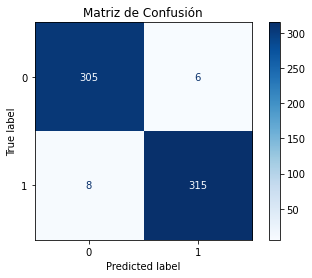

In [20]:
'''Graficar la matriz de confusión'''
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
'''Clase para determinar la matriz de confusión'''
from sklearn.metrics import confusion_matrix
'''Matriz de confusión'''
confusion_matrix(y_test, linear_pred)
plot_confusion_matrix(svc, X_test, y_test, cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

# Interpretación de Resultados

Atreves de la implementación del presente modelo svm podemos observar que dicho modelo nos dio como resultado una precisión del 97% aproximadamente, lo que nos quiere dar a entender que nuestro modelo es óptimo, ya que predijo adecuadamente el género de la persona por medio de las características de la voz. Además, podemos comprobar mediante la diagonal de la matriz de confusión obtuvo un resultado óptimo, ya que existen 305 casos verdaderamente positivos y 315 verdaderamente negativos. Lo que quiere decir, que el modelo implementado es eficiente al momento de predecir si la voz pertenece a un hombre o a una mujer.